In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot 
import cv2
import random
import os
import glob
from tqdm.notebook import tqdm
import albumentations as A
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout , BatchNormalization
from tensorflow.keras.models import  Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix 
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
import os
import glob

# Define the base directory where the chest x-ray folder is located
base_dir = 'C:\\Users\\shamb\\Downloads\\archive (7)\\chest_xray\\chest_xray'

# Construct paths for train, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# List all .jpeg files in train, validation, and test directories
train_data = glob.glob(os.path.join(train_dir, '**', '*.jpeg'), recursive=True)
val_data = glob.glob(os.path.join(val_dir, '**', '*.jpeg'), recursive=True)
test_data = glob.glob(os.path.join(test_dir, '**', '*.jpeg'), recursive=True)

# Print the number of images in each dataset
print("〰" * 20)
print(f"Training Set has: {len(train_data)} images")
print(f"Testing Set has: {len(test_data)} images")
print(f"Validation Set has: {len(val_data)} images")
print("〰" * 20)

# Initialize lists for storing image paths categorized as pneumonia or normal
sets = ["train", "test", "val"]
all_pneumonia = []
all_normal = []

# Loop through each set and categorize images
for cat in sets:
    path = os.path.join(base_dir, cat)
    norm = glob.glob(os.path.join(path, "NORMAL", "*.jpeg"))
    pneu = glob.glob(os.path.join(path, "PNEUMONIA", "*.jpeg"))
    all_normal.extend(norm)
    all_pneumonia.extend(pneu)

# Print the number of pneumonia and normal images collected
print("〰" * 20)
print(f"Total Pneumonia Images: {len(all_pneumonia)}")
print(f"Total Normal Images: {len(all_normal)}")
print("〰" * 20)


〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰
Training Set has: 5216 images
Testing Set has: 624 images
Validation Set has: 16 images
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰
Total Pneumonia Images: 4273
Total Normal Images: 1583
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


In [4]:

import plotly.graph_objs as go
from plotly.offline import iplot

# Data for the pie chart
labels = ["Normal", "Pneumonia"]
values = [len(all_normal), len(all_pneumonia)]
colors = ['green', 'pink']

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])

# Update traces for the pie chart
fig.update_traces(
    hoverinfo='value',
    textinfo='label+percent',
    textfont_size=20,
    marker=dict(colors=colors, line=dict(color='#000000', width=3))
)

# Update layout for the pie chart
fig.update_layout(
    title="Image Category Distribution",
    titlefont={'size': 30}
)

# Plot the figure
iplot(fig)


In [5]:
import random

# Shuffle the lists of image paths
random.shuffle(all_normal)
random.shuffle(all_pneumonia)

# Select 50 images from each category
images = all_normal[:50] + all_pneumonia[:50]


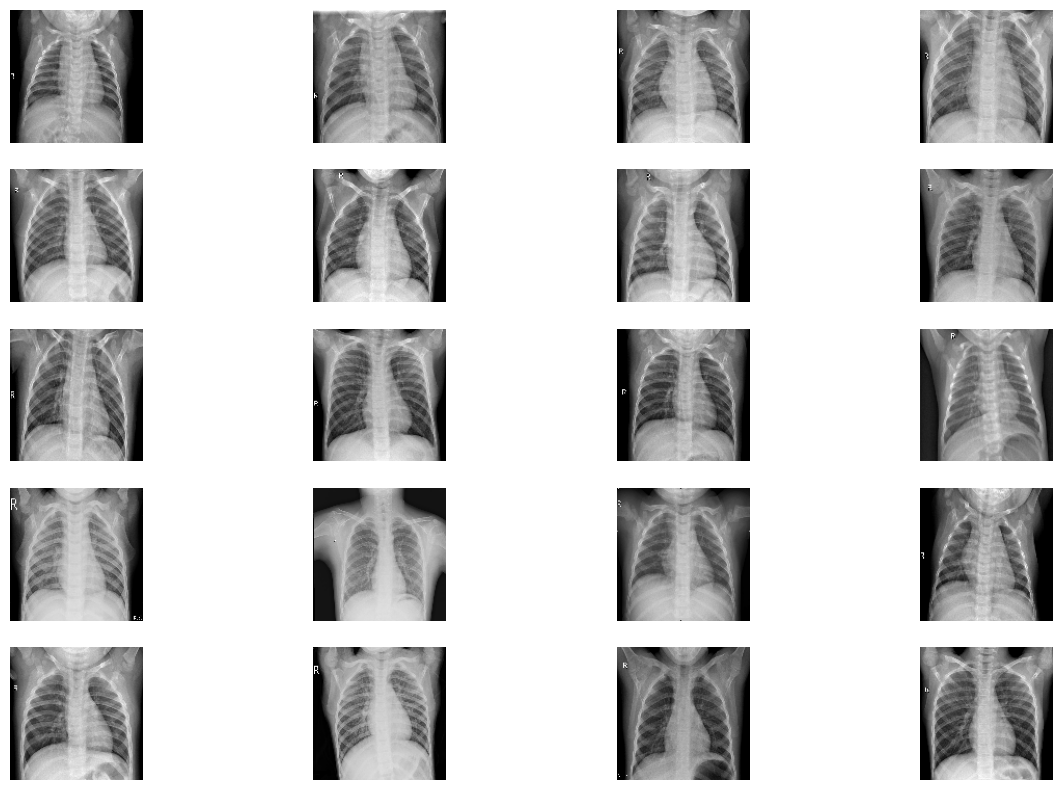

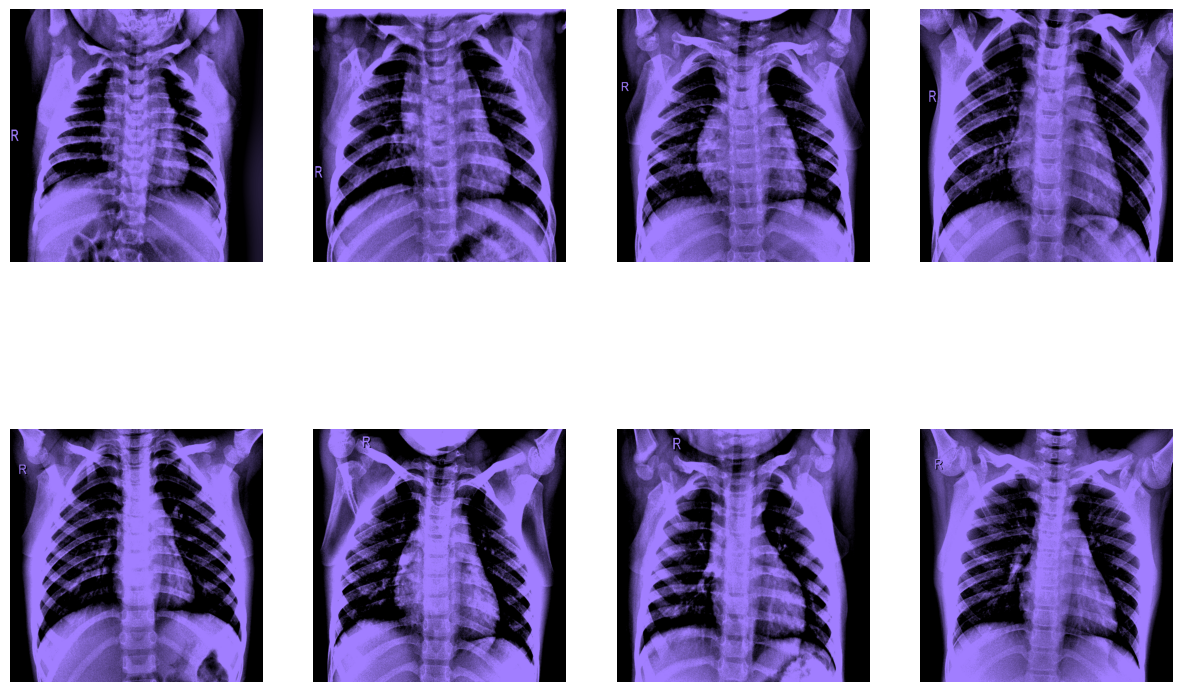

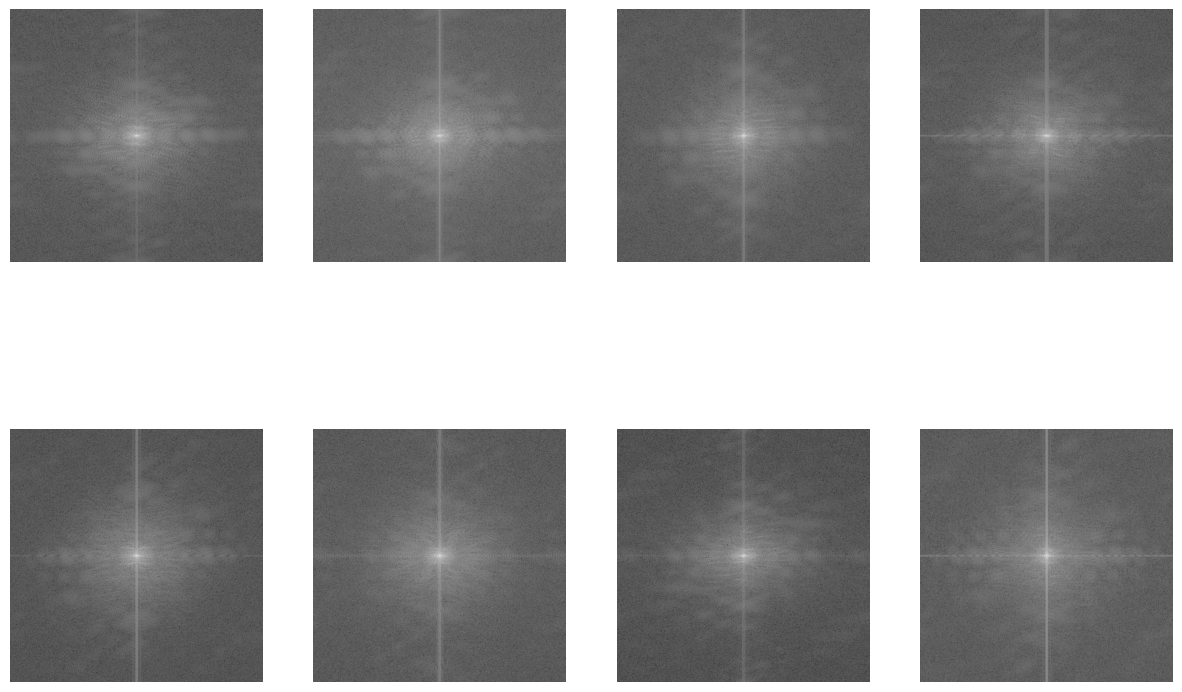

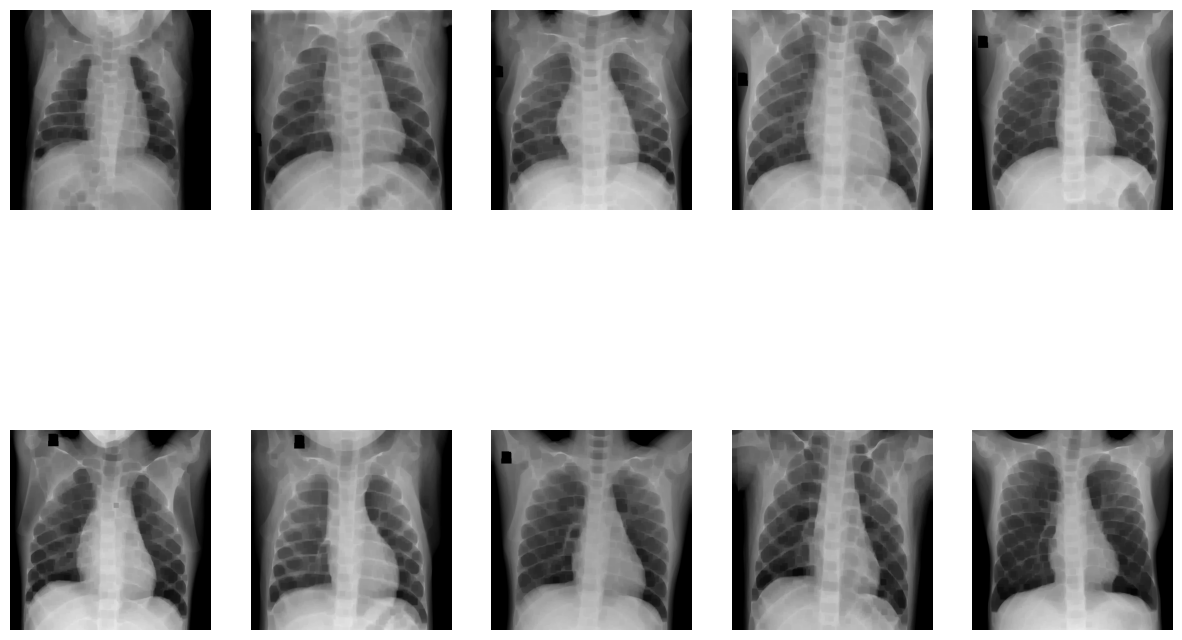

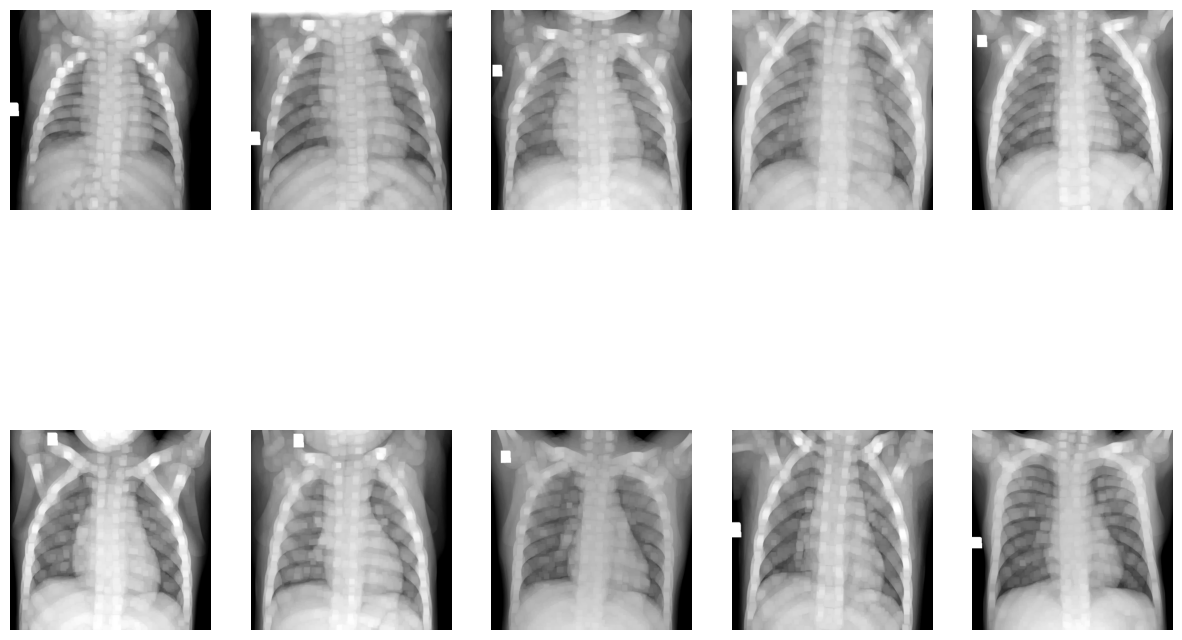

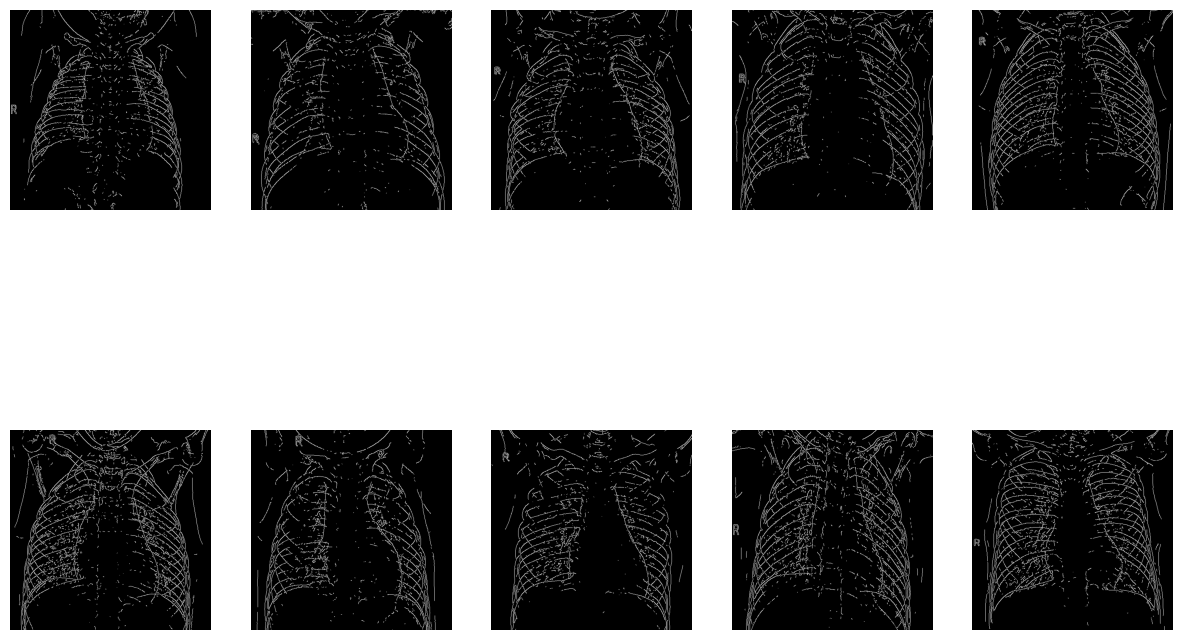

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Display original images
fig = plt.figure(figsize=(15, 10))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (128, 128))
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis(False)
plt.show()

# Display images in HSV color space with enhanced contrast
fig = plt.figure(figsize=(15, 10))
columns = 4
rows = 2
for i in range(1, columns * rows + 1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 512 / 10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))
    plt.axis(False)
plt.show()

# Display magnitude spectrum of images
fig = plt.figure(figsize=(15, 10))
columns = 4
rows = 2
for i in range(1, columns * rows + 1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    fig.add_subplot(rows, columns, i)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.axis(False)
plt.show()

# Display images after erosion
fig = plt.figure(figsize=(15, 10))
columns = 5
rows = 2
for i in range(1, columns * rows + 1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_erosion)
    plt.axis(False)
plt.show()

# Display images after dilation
fig = plt.figure(figsize=(15, 10))
columns = 5
rows = 2
for i in range(1, columns * rows + 1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_dilation = cv2.dilate(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_dilation)
    plt.axis(False)
plt.show()

# Display edge-detected images
fig = plt.figure(figsize=(15, 10))
columns = 5
rows = 2
for i in range(1, columns * rows + 1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(img, 80, 100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(edges, cmap='gray')
    plt.axis(False)
plt.show()


In [7]:
import os
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base directory
base_dir = 'C:\\Users\\shamb\\Downloads\\archive (7)\\chest_xray\\chest_xray'

# Construct paths for train, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
# List all .jpeg files in train, validation, and test directories
train_data = glob.glob(os.path.join(train_dir, '**', '*.jpeg'), recursive=True)
val_data = glob.glob(os.path.join(val_dir, '**', '*.jpeg'), recursive=True)
test_data = glob.glob(os.path.join(test_dir, '**', '*.jpeg'), recursive=True)


# Define the data generators
train_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=30,  # Range of rotation angles in degrees
    zoom_range=0.4
)

val_gen = ImageDataGenerator(
    rescale=1/255.
)

test_gen = ImageDataGenerator(
    rescale=1/255.
)

# Create data generators for training, validation, and test sets
Train = train_gen.flow_from_directory(
    train_dir,
    batch_size=16,
    target_size=(224, 224),
    class_mode="binary"  # Use 'binary' for binary classification
)

val = val_gen.flow_from_directory(
    val_dir,
    batch_size=8,
    target_size=(224, 224),
    class_mode="binary"  # Use 'binary' for binary classification
)

test = test_gen.flow_from_directory(
    test_dir,
    batch_size=8,
    target_size=(224, 224),
    class_mode="binary"  # Use 'binary' for binary classification
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Convolutional Neural Network Architecture
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 4
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(128, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(64, activation='relu'))

# Output Layer for Binary Classification
model.add(Dense(2, activation='softmax'))

# Print model summary to see the architecture
model.summary()


c:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,819,458 (26.01 MB)

 Trainable params: 6,819,458 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import glob

# Define base directory
base_dir = 'C:\\Users\\shamb\\Downloads\\archive (7)\\chest_xray\\chest_xray'

# Construct paths for train, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define EarlyStopping callback
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Define data generators
train_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=30,  # Range of rotation angles in degrees
    zoom_range=0.4
)

val_gen = ImageDataGenerator(
    rescale=1/255.
)

# Create data generators for training and validation sets
Train = train_gen.flow_from_directory(
    train_dir,
    batch_size=16,
    target_size=(224, 224),
    class_mode="binary"  # Use 'binary' for binary classification
)

val = val_gen.flow_from_directory(
    val_dir,
    batch_size=8,
    target_size=(224, 224),
    class_mode="binary"  # Use 'binary' for binary classification
)

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Single output unit for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Use binary crossentropy for binary classification
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    Train,                 # Training data generator
    validation_data=val,   # Validation data generator
    epochs=20,             # Number of epochs to train the model
    steps_per_epoch=Train.samples // Train.batch_size,  # Number of batches per epoch
    callbacks=[early_stopping_cb]  # List of callbacks to apply during training
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/20


c:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



326/326 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.7651 - loss: 0.4957 - val_accuracy: 0.6250 - val_loss: 0.7213
Epoch 2/20


c:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.7213
Epoch 3/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 302s 921ms/step - accuracy: 0.8416 - loss: 0.3425 - val_accuracy: 0.6250 - val_loss: 1.1615
Epoch 4/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 1.1615
Epoch 5/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 304s 926ms/step - accuracy: 0.8767 - loss: 0.2867 - val_accuracy: 0.6250 - val_loss: 0.9199
Epoch 6/20
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.9199


Found 624 images belonging to 2 classes.
78/78 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step


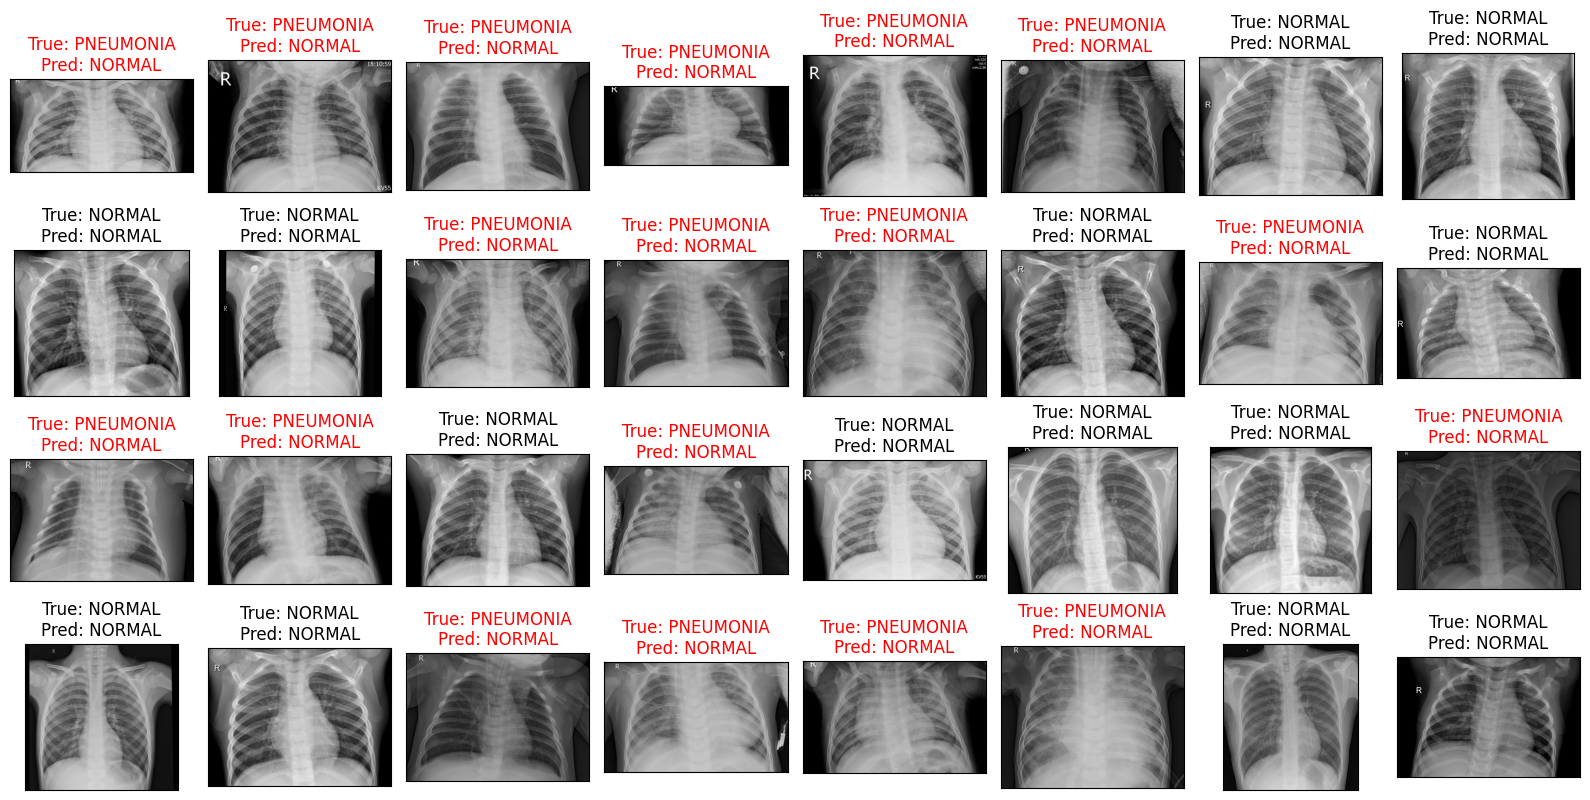

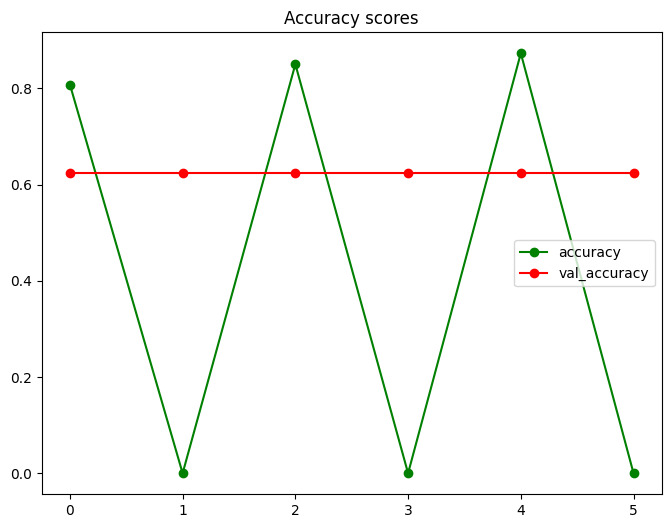

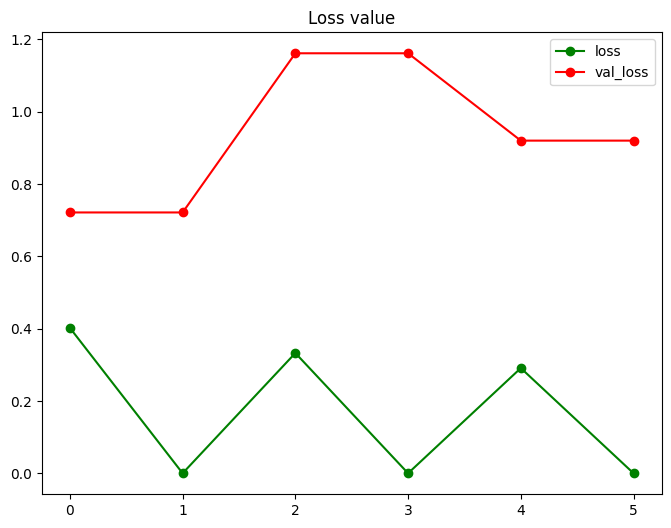

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base directory
base_dir = 'C:\\Users\\shamb\\Downloads\\archive (7)\\chest_xray\\chest_xray'

# Construct paths for train, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# List all .jpeg files in train, validation, and test directories
train_data = glob.glob(os.path.join(train_dir, '**', '*.jpeg'), recursive=True)
val_data = glob.glob(os.path.join(val_dir, '**', '*.jpeg'), recursive=True)
test_data = glob.glob(os.path.join(test_dir, '**', '*.jpeg'), recursive=True)

# Define the data generators
train_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=30,  # Range of rotation angles in degrees
    zoom_range=0.4
)

val_gen = ImageDataGenerator(
    rescale=1/255.
)

test_gen = ImageDataGenerator(
    rescale=1/255.
)

# Generate test data
test = test_gen.flow_from_directory(
    test_dir, batch_size=8, target_size=(224, 224), class_mode='binary'
)

# Predict
predict = model.predict(test, steps=int(np.ceil(test.samples / test.batch_size)))

# Define function to show predictions
def show_predictions(y_true, y_pred, subplot_params, plot_params, class_map, testing_dir, image_file_name, count=8, sample=True):
    fig, axs = plt.subplots(subplot_params["nrows"], subplot_params["ncols"], figsize=(subplot_params["figsize"]))
    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])
    
    file_names = test.filenames
    length = len(file_names)
    m = {}
    for i in range(count):
        num = i
        if sample:
            num = random.randint(0, length-1)
            while num in m:
                num = random.randint(0, length-1)
            m[num] = 1 
        ax = axs[i // subplot_params["ncols"], i % subplot_params["ncols"]]
        img = cv2.imread(os.path.join(testing_dir, file_names[num]))
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_xticks([])
        ax.set_yticks([])
        original = class_map[y_true[num]]
        predicted = class_map[y_pred[num]]
        title_text = f"True: {original}\nPred: {predicted}"
        ax.set_title(title_text, color='red' if original != predicted else 'black')
        
    if plot_params["update_image"] and os.path.exists(image_file_name):
        os.remove(image_file_name)
    fig.savefig(image_file_name, dpi=subplot_params["dpi"])
    plt.tight_layout()
    plt.show()

# Parameters for plotting
image_file_name_batch = "batch.png"  # Change to actual path
image_file_name_sample = "sample.png"  # Change to actual path
batch_size_t = 8
class_map = {v: k for k, v in test.class_indices.items()}
subplot_params = {"nrows": 4, "ncols": 8, "figsize": (16, 8), "dpi": 100, "hspace": 0.5, "wspace": 0.5}
plot_params = {"axes.titlesize": 12, "update_image": False}

# Ensure y_true_batch and y_pred_batch are defined appropriately
y_true_batch = test.classes  # Replace with actual labels if needed
y_pred_batch = np.argmax(predict, axis=-1)  # Replace with actual predictions

# Call show_predictions
show_predictions(y_true_batch, y_pred_batch, subplot_params, plot_params, class_map, test_dir, image_file_name_batch, count=batch_size_t*subplot_params["nrows"], sample=True)

# Plot accuracy and loss
plt.figure(figsize=(8, 6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'], 'go-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'ro-', label='val_accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.title('Loss value')
plt.plot(history.history['loss'], 'go-', label='loss')
plt.plot(history.history['val_loss'], 'ro-', label='val_loss')
plt.legend()
plt.show()


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


c:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


c:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.7568 - loss: 0.5479 - val_accuracy: 0.6875 - val_loss: 0.6613
Epoch 2/20


c:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.6613
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8419 - loss: 0.3549 - val_accuracy: 0.6875 - val_loss: 0.6198
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 0.6198
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.8698 - loss: 0.3108 - val_accuracy: 0.6250 - val_loss: 0.7901
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.7901
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.8724 - loss: 0.2902 - val_accuracy: 0.5625 - val_loss: 1.0706
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 1.0706
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.8826 - loss: 

C:\Users\shamb\AppData\Local\Temp\ipykernel_12748\1429007534.py:116: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted = class_map[int(y_pred[num] > 0.5)]  # Adjust for binary classification


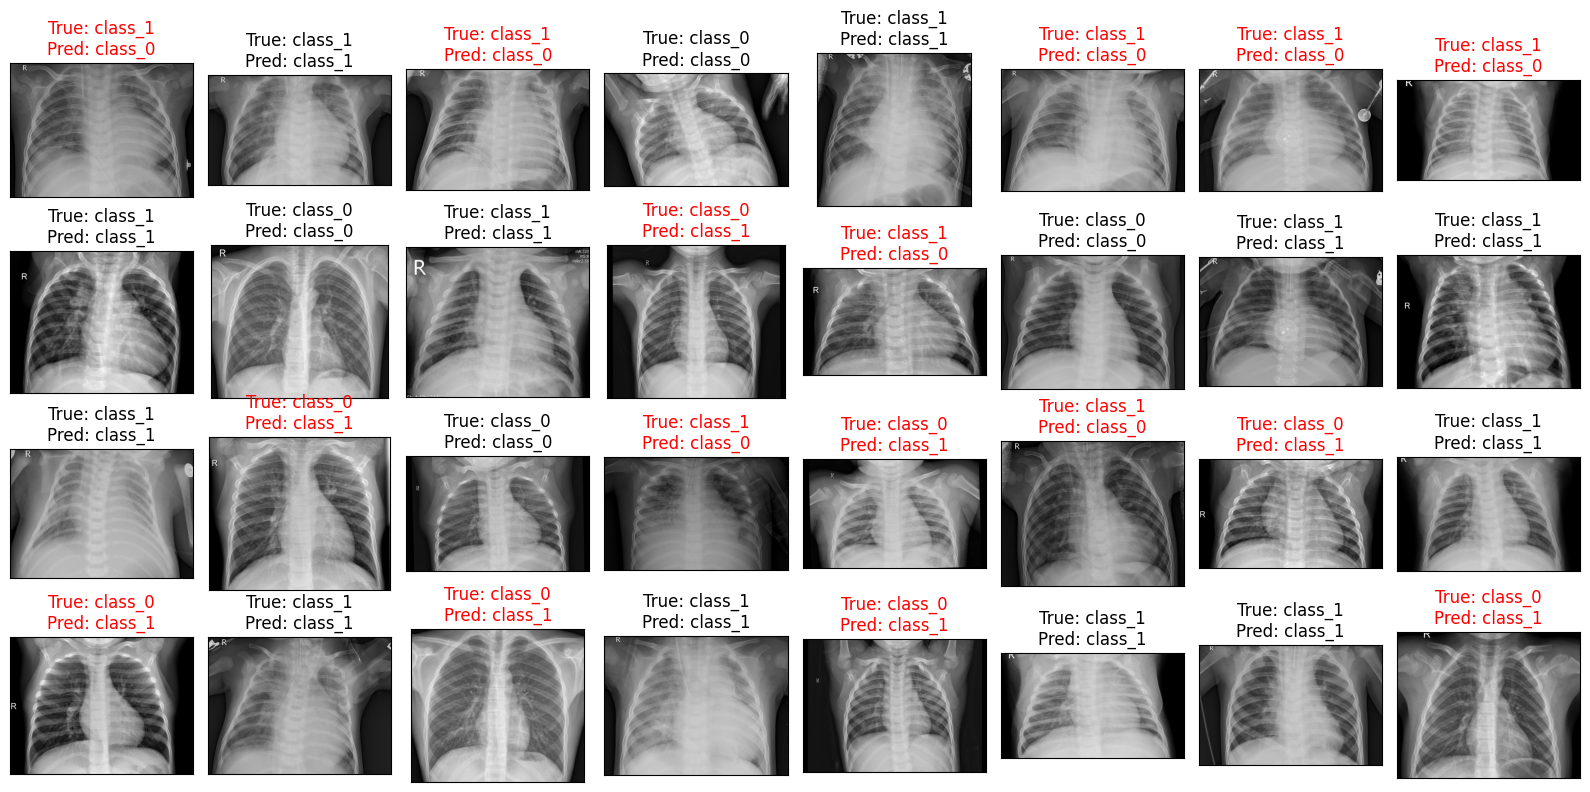

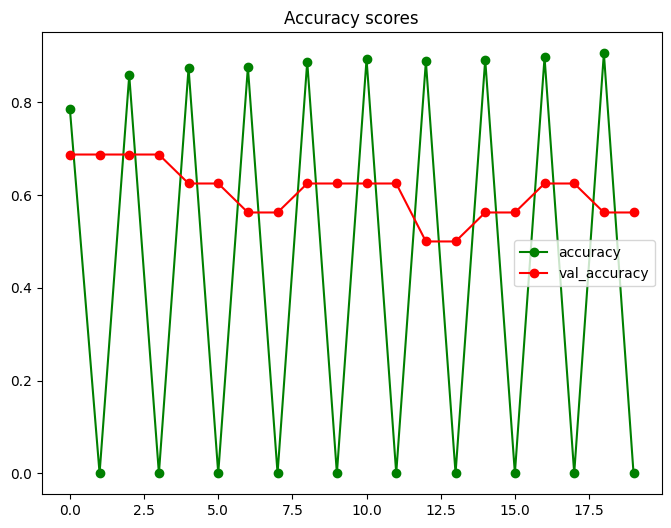

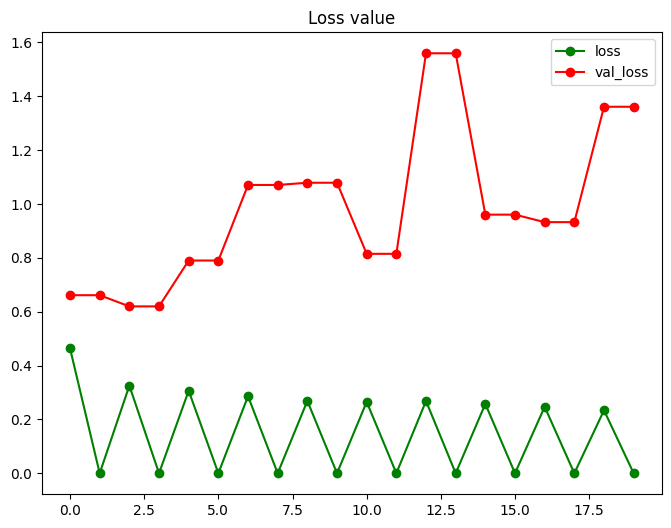

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Define base directory
base_dir = 'C:\\Users\\shamb\\Downloads\\archive (7)\\chest_xray\\chest_xray'

# Construct paths for train, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Data generators for binary classification
train_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=30,
    zoom_range=0.4
)

val_gen = ImageDataGenerator(
    rescale=1/255.
)

test_gen = ImageDataGenerator(
    rescale=1/255.
)

# Create data generators
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Use 'binary' for binary classification
)

val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Build a CNN model for binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 1 unit with 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Use binary crossentropy for binary classification
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)

# Predict on test data
predict = model.predict(test_generator, steps=int(np.ceil(test_generator.samples / test_generator.batch_size)))

# Function to show predictions
def show_predictions(y_true, y_pred, subplot_params, plot_params, class_map, testing_dir, image_file_name, count=8, sample=True):
    fig, axs = plt.subplots(subplot_params["nrows"], subplot_params["ncols"], figsize=(subplot_params["figsize"]))
    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])
    
    file_names = test_generator.filenames
    length = len(file_names)
    m = {}
    for i in range(count):
        num = i
        if sample:
            num = random.randint(0, length-1)
            while num in m:
                num = random.randint(0, length-1)
            m[num] = 1 
        ax = axs[i // subplot_params["ncols"], i % subplot_params["ncols"]]
        img = cv2.imread(os.path.join(testing_dir, file_names[num]))
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_xticks([])
        ax.set_yticks([])
        original = class_map[int(y_true[num])]
        predicted = class_map[int(y_pred[num] > 0.5)]  # Adjust for binary classification
        title_text = f"True: {original}\nPred: {predicted}"
        ax.set_title(title_text, color='red' if original != predicted else 'black')
        
    if plot_params["update_image"] and os.path.exists(image_file_name):
        os.remove(image_file_name)
    fig.savefig(image_file_name, dpi=subplot_params["dpi"])
    plt.tight_layout()
    plt.show()

# Parameters for plotting
image_file_name_batch = "batch.png"
image_file_name_sample = "sample.png"
batch_size_t = 8
class_map = {0: "class_0", 1: "class_1"}  # Adjust the class names accordingly
subplot_params = {"nrows": 4, "ncols": 8, "figsize": (16, 8), "dpi": 100, "hspace": 0.5, "wspace": 0.5}
plot_params = {"axes.titlesize": 12, "update_image": False}

# Ensure y_true_batch and y_pred_batch are defined appropriately
y_true_batch = test_generator.classes  # Ground truth labels
y_pred_batch = (predict > 0.5).astype(int)  # Predicted labels for binary classification

# Call show_predictions
show_predictions(y_true_batch, y_pred_batch, subplot_params, plot_params, class_map, test_dir, image_file_name_batch, count=batch_size_t*subplot_params["nrows"], sample=True)

# Plot accuracy and loss
plt.figure(figsize=(8, 6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'], 'go-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'ro-', label='val_accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.title('Loss value')
plt.plot(history.history['loss'], 'go-', label='loss')
plt.plot(history.history['val_loss'], 'ro-', label='val_loss')
plt.legend()
plt.show()
